In [52]:
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt
from matplotlib import rcParams
import pandas as pd
import numpy as np
import pandas.api.types as ptypes
SESSION_YEAR = 2024
SESSION_NAME = 'Sao Paulo'
SESSION_TYPE = 'R'

# Grand Prix race race laps from each driver

## Get Session

In [53]:
session = fastf1.get_session(SESSION_YEAR, SESSION_NAME, SESSION_TYPE)
session.load()

events      WARNING 	Correcting user input 'Sao Paulo' to 'São Paulo Grand Prix'
core           INFO 	Loading data for São Paulo Grand Prix - Race [v3.6.1]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
core        WARNING 	No lap data for driver 23
core        WARNING 	Failed to perform lap accuracy check - all laps marked as inaccurate (driver 23)
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core  

## Race lap comparison

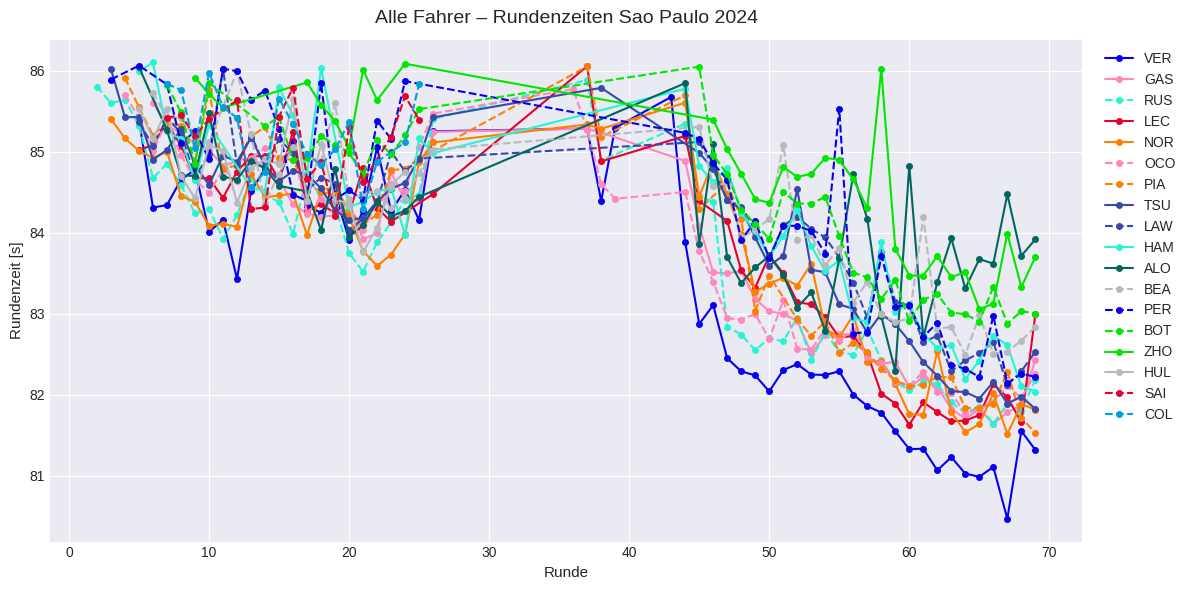

In [54]:
# Alle Quicklaps auswählen (echte Rennrunden)
laps = session.laps.pick_quicklaps()
# Sicherstellen, dass keine NaT in LapTime ist
laps = laps.dropna(subset=['LapTime']).copy()

# Rundenzeiten in Sekunden umrechnen
laps['LapTime_sec'] = laps['LapTime'].dt.total_seconds()


# Fahrer sortieren nach durchschnittlicher Rundenzeit (für konsistente Farben/Legende)
driver_order = laps.groupby('Driver')['LapTime_sec'].mean().sort_values().index.tolist()

# Plot-Stil und Größe
plt.style.use('seaborn-v0_8-darkgrid')
rcParams['figure.figsize'] = (12, 6)

# Farben: colormap mit so vielen Farben wie Fahrer
n_drivers = len(driver_order)
cmap = plt.get_cmap('tab20', n_drivers) if n_drivers > 0 else plt.get_cmap('tab20')

# Plotten: jede Fahrerlinie etwas transparent, kleine Marker
fig, ax = plt.subplots()
for i, drv in enumerate(driver_order):
    d = laps[laps['Driver'] == drv]
    style = plotting.get_driver_style(identifier=drv, style=['color', 'linestyle'], session=session)
    if d.empty:
        continue
    ax.plot(d['LapNumber'], d['LapTime_sec'], marker='o', markersize=4, **style, label=drv)

# Achsen & Titel
ax.set_xlabel('Runde', fontsize=11)
ax.set_ylabel('Rundenzeit [s]', fontsize=11)
ax.set_title('Alle Fahrer – Rundenzeiten ' + SESSION_NAME + ' ' + str(SESSION_YEAR), fontsize=14, pad=12)

# Legende außerhalb des Plots (vermeidet Überlagerung)
ax.legend(loc='upper left', bbox_to_anchor=(1.01, 1), frameon=False, ncol=1)

plt.tight_layout()
plt.show()


# Weather Data for Grand Prix

In [55]:
# Get weather data
weather = session.weather_data

## Temperature, Humidity, Wind Speed

                      Time  AirTemp  Humidity  Pressure  Rainfall  TrackTemp  \
0   0 days 00:00:22.903000     22.2      86.0     927.4      True       27.3   
1   0 days 00:01:22.903000     22.3      87.0     927.3      True       26.2   
2   0 days 00:02:22.903000     22.1      86.0     927.4      True       26.4   
3   0 days 00:03:22.906000     22.1      87.0     927.4      True       26.4   
4   0 days 00:04:22.910000     22.1      87.0     927.3      True       26.2   
..                     ...      ...       ...       ...       ...        ...   
196 0 days 03:16:23.548000     20.5      89.0     925.5     False       24.2   
197 0 days 03:17:23.549000     20.5      89.0     925.5     False       24.1   
198 0 days 03:18:23.549000     20.5      89.0     925.4     False       24.0   
199 0 days 03:19:23.568000     20.5      89.0     925.4     False       24.0   
200 0 days 03:20:23.566000     20.5      89.0     925.4     False       24.1   

     WindDirection  WindSpeed  
0      

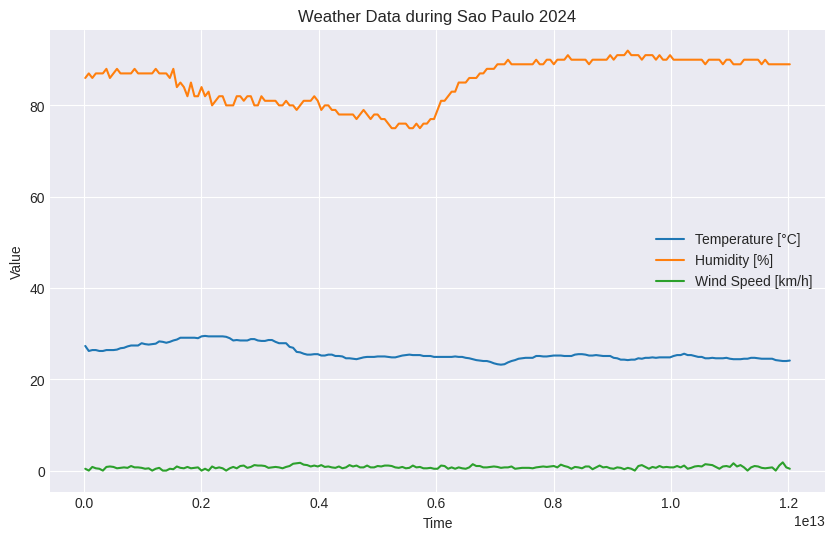

In [56]:
print(weather)
plt.figure(figsize=(10, 6))
plt.plot(weather['Time'], weather['TrackTemp'], label='Temperature [°C]')
plt.plot(weather['Time'], weather['Humidity'], label='Humidity [%]')
plt.plot(weather['Time'], weather['WindSpeed'], label='Wind Speed [km/h]')
plt.xlabel('Time')
plt.ylabel('Value')
plt.title('Weather Data during ' + SESSION_NAME + ' ' + str(SESSION_YEAR))
plt.legend()
plt.show()


## Rainfall

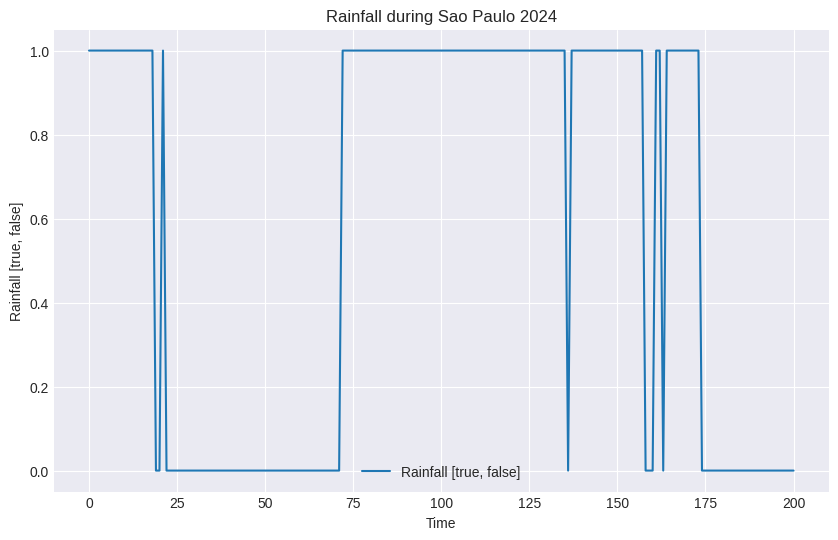

In [57]:
plt.figure(figsize=(10, 6))
plt.plot(weather['Rainfall'], label='Rainfall [true, false]')
plt.xlabel('Time')
plt.ylabel('Rainfall [true, false]')
plt.title('Rainfall during ' + SESSION_NAME + ' ' + str(SESSION_YEAR))
plt.legend()
plt.show()

# Print available data

In [ ]:
print(session.results)